In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
def load_battery_data(filepath):
    """
    Load battery dataset CSV file.
    """
    df = pd.read_csv(filepath, parse_dates=["start_time"])
    return df

In [3]:
dataset_path = '../battery_alt_dataset/regular_alt_batteries'

battery_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
print(f"Found {len(battery_files)} battery files.")

Found 15 battery files.


In [4]:
battery_files

['battery00.csv',
 'battery01.csv',
 'battery11.csv',
 'battery10.csv',
 'battery21.csv',
 'battery20.csv',
 'battery22.csv',
 'battery23.csv',
 'battery30.csv',
 'battery31.csv',
 'battery41.csv',
 'battery40.csv',
 'battery50.csv',
 'battery51.csv',
 'battery52.csv']

In [5]:
sample_file = os.path.join(dataset_path, battery_files[])
df = load_battery_data(sample_file)

# Display first few rows
df.head()

,start_time,time,mode,voltage_charger,temperature_battery,voltage_load,current_load,temperature_mosfet,temperature_resistor,mission_type
0,2022-07-19 15:03:00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,2022-07-19 15:03:00,0.88,0.00,8.24,22.69,NaN,NaN,NaN,NaN,NaN
2,2022-07-19 15:03:00,1.80,0.00,8.24,22.70,NaN,NaN,NaN,NaN,NaN
3,2022-07-19 15:03:00,2.72,0.00,8.24,22.69,NaN,NaN,NaN,NaN,NaN
4,2022-07-19 15:03:00,3.64,0.00,8.24,22.69,NaN,NaN,NaN,NaN,NaN


In [6]:
# Shape of the dataset (rows, columns)
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (207391, 10)


In [7]:
# Column names and data types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207391 entries, 0 to 207390
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   start_time            207391 non-null  datetime64[ns]
 1   time                  207391 non-null  float64       
 2   mode                  207391 non-null  float64       
 3   voltage_charger       207391 non-null  float64       
 4   temperature_battery   207391 non-null  float64       
 5   voltage_load          18927 non-null   float64       
 6   current_load          18927 non-null   float64       
 7   temperature_mosfet    18927 non-null   float64       
 8   temperature_resistor  18927 non-null   float64       
 9   mission_type          18927 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 15.8 MB


In [13]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
df.drop(columns=['start_time', 'time']).describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
mode,207391.00,0.38,0.65,-1.00,0.00,0.00,1.00,1.00
voltage_charger,207391.00,7.38,0.91,-0.12,6.74,7.47,8.25,9.16
temperature_battery,207391.00,34.61,17.69,0.00,22.79,28.78,34.59,109.17
voltage_load,18927.00,6.65,0.73,-0.03,6.19,6.61,7.03,8.71
current_load,18927.00,13.08,8.25,0.15,2.52,19.42,19.58,19.78
temperature_mosfet,18927.00,28.83,3.39,19.57,24.87,30.36,31.86,33.61
temperature_resistor,18927.00,29.93,5.66,22.59,22.96,33.13,35.17,36.09
mission_type,18927.00,0.62,0.48,0.00,0.00,1.00,1.00,1.00


In [17]:
# Count of missing values per column
print("\nMissing Values Count:")
print(df.isnull().sum())

# Percentage of missing values
missing_percent = df.isnull().sum() * 100 / len(df)
print("\nMissing Values Percentage:")
print(missing_percent[missing_percent > 0])


Missing Values Count:
start_time                   0
time                         0
mode                         0
voltage_charger              0
temperature_battery          0
voltage_load            188464
current_load            188464
temperature_mosfet      188464
temperature_resistor    188464
mission_type            188464
dtype: int64

Missing Values Percentage:
voltage_load           90.87
current_load           90.87
temperature_mosfet     90.87
temperature_resistor   90.87
mission_type           90.87
dtype: float64


In [15]:
# Count duplicate rows
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Dropping duplicates if necessary
df = df.drop_duplicates()


Duplicate Rows: 0


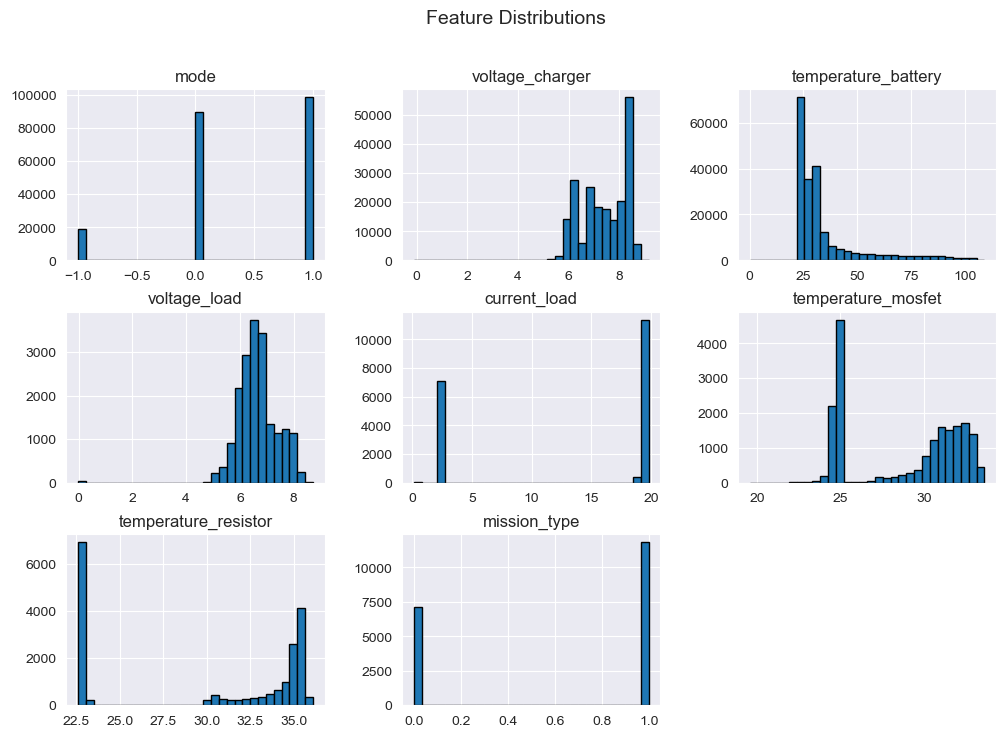

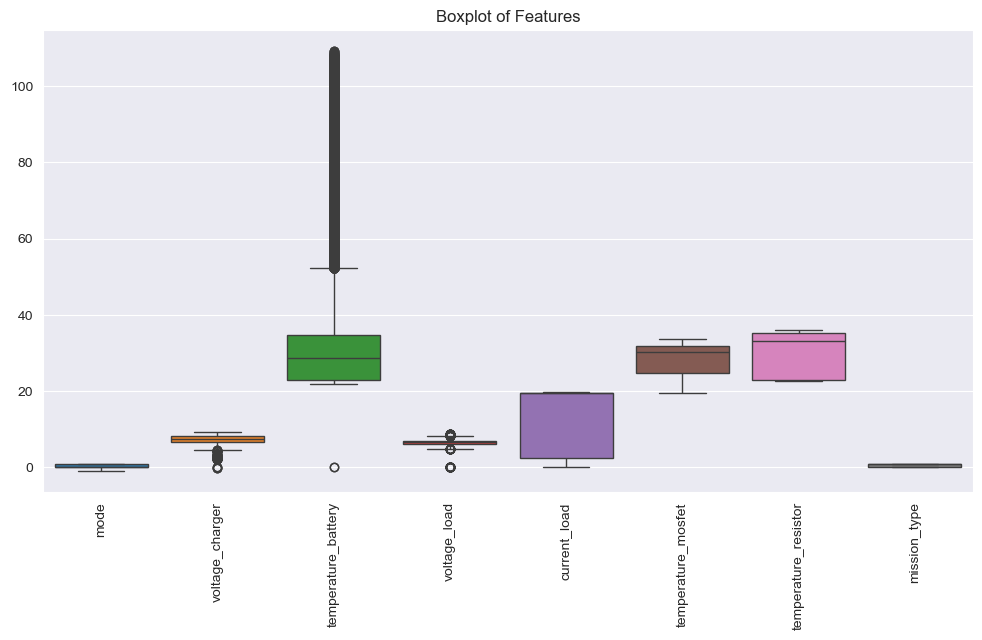

In [16]:
timeless_df = df.drop(columns=["start_time", "time"])
# Histogram for numerical columns
timeless_df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplot for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["start_time", "time"]))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

In [52]:
df.nunique()


start_time                   17
time                    1101244
mode                          3
voltage_charger            5034
temperature_battery       12489
voltage_load               4118
current_load              16194
temperature_mosfet         1233
temperature_resistor       1218
mission_type                  2
dtype: int64